In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data (1).csv


In [ ]:
dataset = pd.read_csv('Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


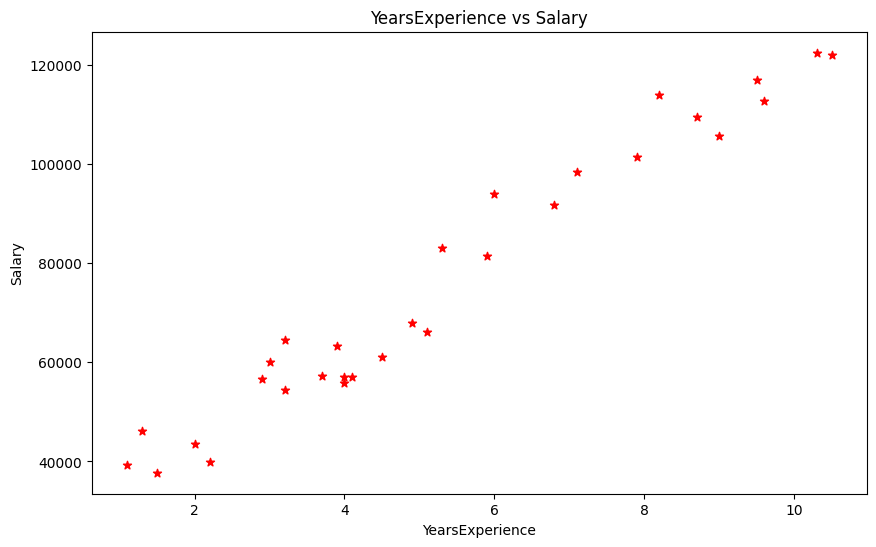

In [ ]:
# Visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(x= 'YearsExperience', y='Salary', data=dataset, marker='*',color='red')
plt.title('YearsExperience vs Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

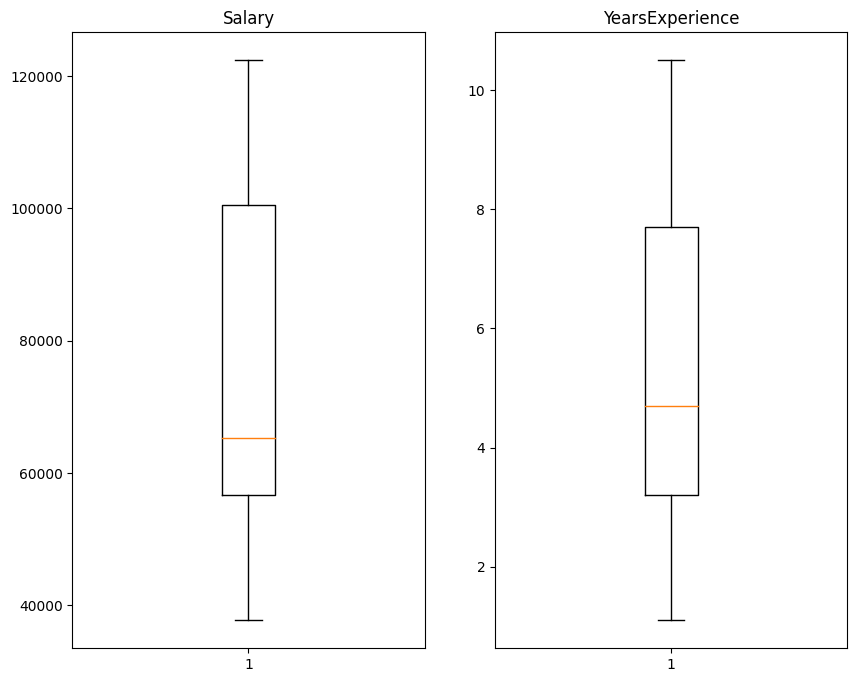

In [ ]:
# Boxplot
plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
plt.boxplot(dataset['Salary'])
plt.title('Salary')
plt.subplot(1,2,2)
plt.boxplot(dataset['YearsExperience'])
plt.title('YearsExperience')
plt.show()

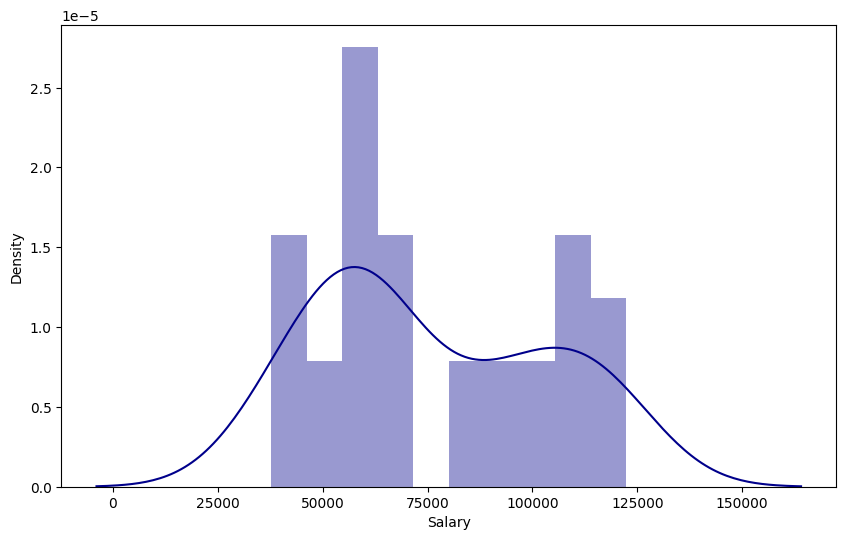

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.distplot(dataset['Salary'], hist=True, kde=True, bins=10, color = 'darkblue')
plt.show()

In [ ]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


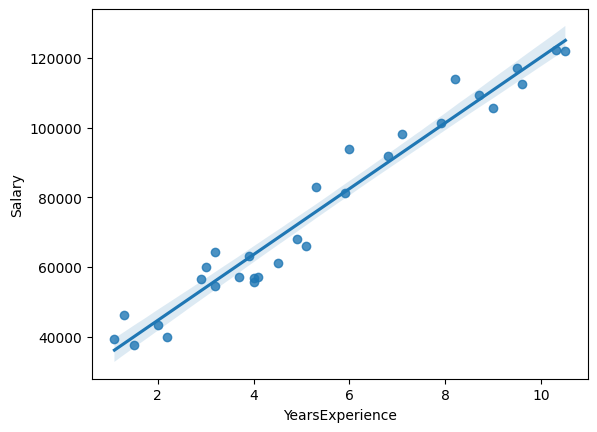

In [ ]:
sns.regplot(x=dataset['YearsExperience'], y=dataset['Salary'])
plt.show()

### Model Building

In [ ]:
model=smf.ols("Salary~YearsExperience",data=dataset).fit()

### Model Testing

In [ ]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [ ]:
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [ ]:
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           1.14e-20
Time:                        08:37:07   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model Prediction

In [ ]:
# Manual prediction for say 3 Years Experience
Salary = (25792.2001) + (9449.9623)*(3)
Salary

54142.087

In [ ]:
# Automatic Prediction for say 3 & 5 Years Experience
new_data = pd.Series([3,5])

In [ ]:
data_pred = pd.DataFrame(new_data, columns = ['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [ ]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64

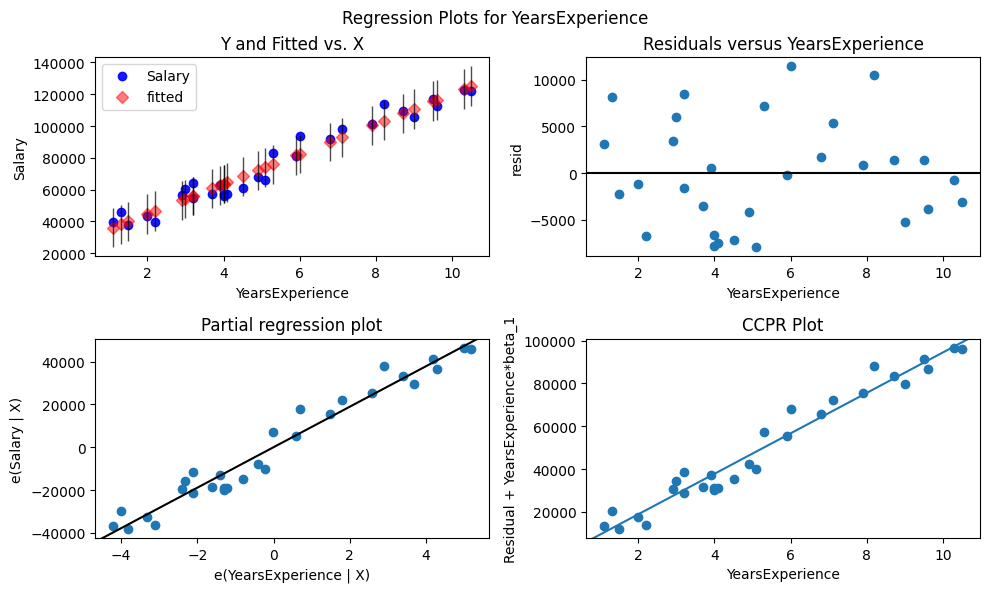

In [ ]:
#Residual vs Fitted values plot
fig = plt.figure(figsize=(10, 6))
sm.graphics.plot_regress_exog(model, 'YearsExperience',fig=fig)
plt.show()

 The residuals appear to be randomly scattered around zero, therefore heteroscedasticity is not a problem with the explanatory variable.

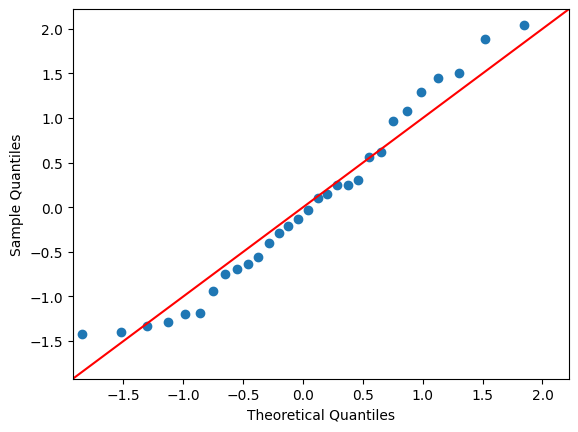

In [ ]:
#Q-Q plot:
fig = sm.qqplot(model.resid, fit=True, line="45")
plt.show()

We can see in our Q-Q plot above that the data values tend to closely follow the 45-degree, which means the data is likely normally distributed.

In [ ]:
predicted = pd.DataFrame()
predicted['YearsExperience'] = dataset.YearsExperience
predicted['Salary'] = dataset.Salary
predicted['Predicted_Salary_Hike'] = pd.DataFrame(model.predict(predicted.YearsExperience))
predicted

,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
